In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.dpi'] = 120

In [5]:
tickers = ["AAPL","MSFT","TSLA"]

df = yf.download(tickers, period="1y", auto_adjust=True, progress=False)

In [6]:
df.head()

Price            Close                                High              \
Ticker            AAPL        MSFT        TSLA        AAPL        MSFT   
Date                                                                     
2024-09-13  221.469269  427.381439  230.289993  223.002128  428.612190   
2024-09-16  215.317902  428.125854  226.779999  216.213726  430.299538   
2024-09-17  215.785721  431.907440  227.869995  215.895212  438.557527   
2024-09-18  219.667664  427.599792  227.199997  221.678310  432.780897   
2024-09-19  227.809769  435.421082  243.919998  228.755380  438.210140   

Price                          Low                                Open  \
Ticker            TSLA        AAPL        MSFT        TSLA        AAPL   
Date                                                                     
2024-09-13  232.669998  220.882006  422.289661  226.320007  222.544268   
2024-09-16  229.960007  212.929011  425.029108  223.529999  215.536868   
2024-09-17  234.570007  213.506336  429.048896  226.550003  214.750545   
2024-09-18  235.679993  216.532247  427.202779  226.880005  216.542210   
2024-09-19  244.240005  223.589420  433.644411  232.130005  223.947753   

Price                                 Volume                       
Ticker            MSFT        TSLA      AAPL      MSFT       TSLA  
Date                                                               
2024-09-13  422.656899  228.000000  36766600  15874600   59515100  
2024-09-16  427.391378  229.300003  59357400  13834700   54323000  
2024-09-17  436.949603  229.449997  45519300  18874200   66761600  
2024-09-18  431.758573  230.089996  59894900  18898000   78010200  
2024-09-19  437.942163  234.000000  66781300  21706600  102694600

In [8]:
prices = df['Close']
prices.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-13,221.469269,427.381439,230.289993
2024-09-16,215.317902,428.125854,226.779999
2024-09-17,215.785721,431.907440,227.869995
2024-09-18,219.667664,427.599792,227.199997
2024-09-19,227.809769,435.421082,243.919998


In [12]:
normalized = prices / prices.iloc[0] * 100
normalized.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-13,100.000000,100.000000,100.000000
2024-09-16,97.222474,100.174181,98.475837
2024-09-17,97.433708,101.059007,98.949152
2024-09-18,99.186521,100.051091,98.658215
2024-09-19,102.862925,101.881140,105.918627


<function matplotlib.pyplot.show(close=None, block=None)>

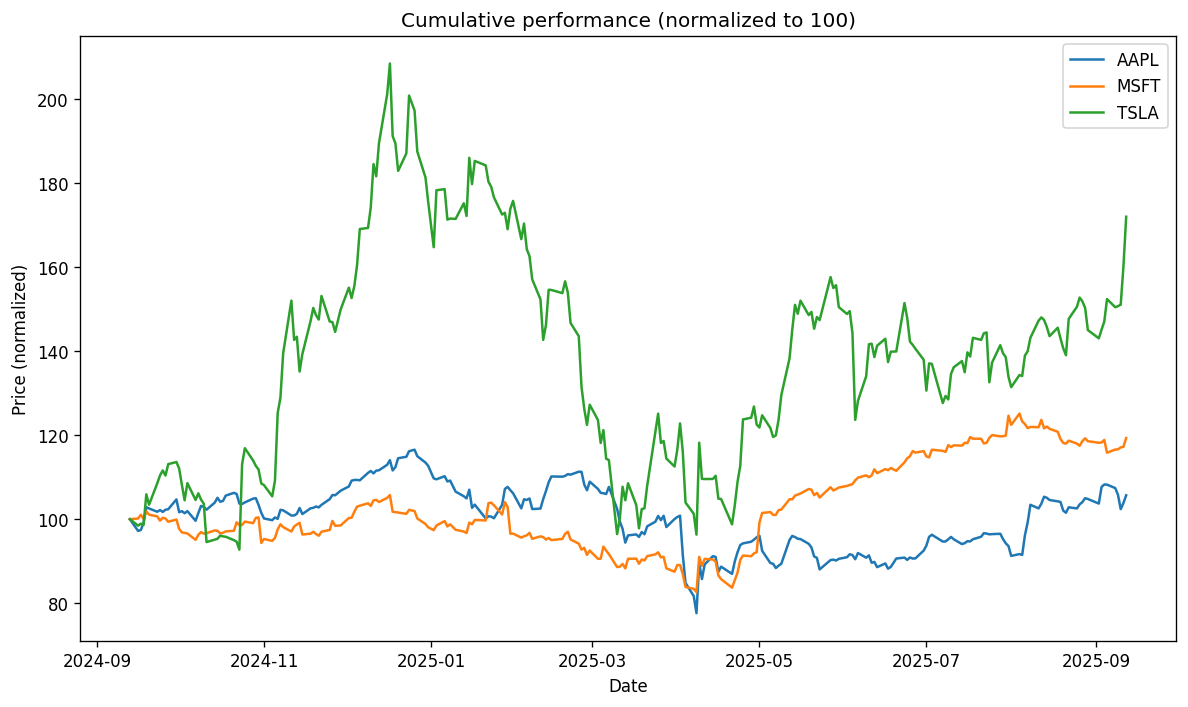

In [14]:
plt.figure()
for ticker in normalized.columns:
    plt.plot(normalized.index, normalized[ticker], label=ticker)

plt.title("Cumulative performance (normalized to 100)")
plt.xlabel("Date")
plt.ylabel("Price (normalized)")
plt.legend()
plt.tight_layout()
plt.show

### Graph above shows the cumulative performance of AAPL, MSFT and TSLA over the past year, normalized to 100 so their growth can be directly compared

In [17]:
returns = prices.pct_change().dropna()
returns.head()

Ticker,AAPL,MSFT,TSLA
Date,,,
2024-09-16,-0.027775,0.001742,-0.015242
2024-09-17,0.002173,0.008833,0.004806
2024-09-18,0.017990,-0.009974,-0.002940
2024-09-19,0.037066,0.018291,0.073592
2024-09-20,-0.002927,-0.007796,-0.023245


In [ ]:
corr = returns.corr()
print(corr) 

Ticker      AAPL      MSFT      TSLA
Ticker                              
AAPL    1.000000  0.531357  0.488690
MSFT    0.531357  1.000000  0.438245
TSLA    0.488690  0.438245  1.000000


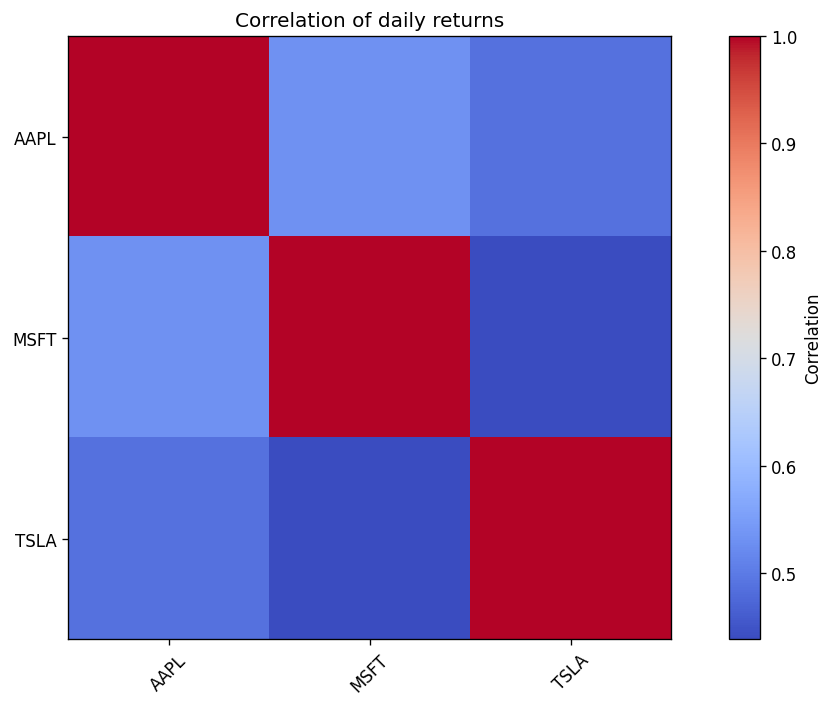

In [19]:
plt.imshow(corr, cmap="coolwarm", interpolation="none")
plt.colorbar(label="Correlation")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.index)
plt.title("Correlation of daily returns")
plt.tight_layout()
plt.show()

#### The heatmap above shows the correlation of daily returns between APPL, MSFT and TSLA, where red indicates a strong positive correlation and blue indicates a negative correlation.